In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

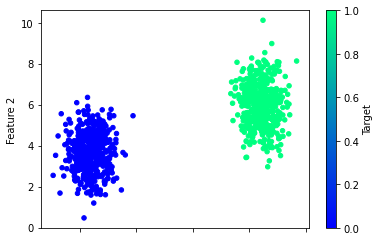

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
df

,Feature 1,Feature 2,Target
0,5.478098,7.203714,1
1,-8.428483,4.121889,0
2,-7.905447,3.323639,0
3,6.411041,5.523013,1
4,7.288599,6.171226,1
...,...,...,...
995,6.208962,5.233968,1
996,-9.795754,3.502709,0
997,4.335167,5.928298,1
998,-8.466632,3.577022,0


In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

## Different Activation Functions

- tanh 
    - is also identified by a characteristic S curve; however, it transforms the output to a range between -1 and 1.
- sigmoid
    -  is identified by a characteristic S curve. It transforms the output to a range between 0 and 1.
- relu
    - returns a value from 0 to infinity, so any negative input through the activation function is 0. It is the most used activation function in neural networks due to its simplifying output, but it might not be appropriate for simpler models.
- leaky relu
    - is a "leaky" alternative to the ReLU function, whereby negative input values will return very small negative values.

In [7]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [8]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [9]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 512us/step - loss: 0.6725 - accuracy: 0.7333
Epoch 2/100
24/24 [==============================] - 0s 512us/step - loss: 0.6670 - accuracy: 0.7560
Epoch 3/100
24/24 [==============================] - 0s 469us/step - loss: 0.6607 - accuracy: 0.7773
Epoch 4/100
24/24 [==============================] - 0s 512us/step - loss: 0.6535 - accuracy: 0.7973
Epoch 5/100
24/24 [==============================] - 0s 512us/step - loss: 0.6454 - accuracy: 0.8120
Epoch 6/100
24/24 [==============================] - 0s 555us/step - loss: 0.6364 - accuracy: 0.8320
Epoch 7/100
24/24 [==============================] - 0s 555us/step - loss: 0.6264 - accuracy: 0.8427
Epoch 8/100
24/24 [==============================] - 0s 555us/step - loss: 0.6157 - accuracy: 0.8587
Epoch 9/100
24/24 [==============================] - 0s 597us/step - loss: 0.6041 - accuracy: 0.8667
Epoch 10/100
24/24 [==============================] - 0s 555us/step - loss: 0.5920 - accura

24/24 [==============================] - 0s 512us/step - loss: 0.1136 - accuracy: 0.9987
Epoch 82/100
24/24 [==============================] - 0s 512us/step - loss: 0.1115 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 512us/step - loss: 0.1095 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 512us/step - loss: 0.1075 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 512us/step - loss: 0.1055 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 512us/step - loss: 0.1036 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 555us/step - loss: 0.1018 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 469us/step - loss: 0.1000 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 512us/step - loss: 0.0982 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 597us/step - loss: 0.0965 - accuracy: 

<AxesSubplot:>

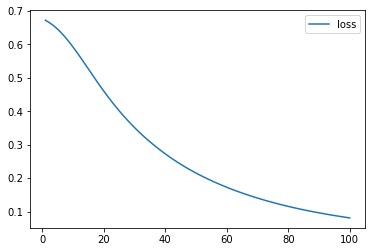

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

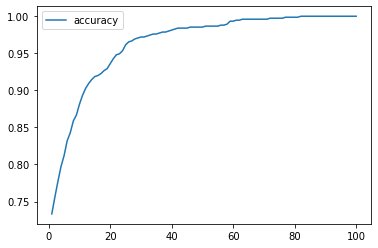

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0757 - accuracy: 1.0000
Loss: 0.07568556070327759, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

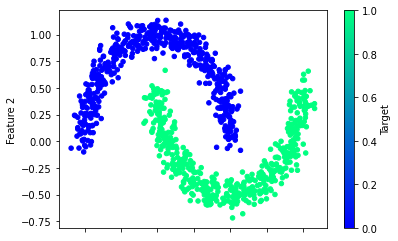

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 811us/step - loss: 1.1541 - accuracy: 0.4267
Epoch 2/100
24/24 [==============================] - 0s 815us/step - loss: 1.0044 - accuracy: 0.4493
Epoch 3/100
24/24 [==============================] - 0s 896us/step - loss: 0.9063 - accuracy: 0.4787
Epoch 4/100
24/24 [==============================] - 0s 768us/step - loss: 0.8447 - accuracy: 0.5040
Epoch 5/100
24/24 [==============================] - 0s 811us/step - loss: 0.7973 - accuracy: 0.5133
Epoch 6/100
24/24 [==============================] - 0s 853us/step - loss: 0.7600 - accuracy: 0.5453
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7288 - accuracy: 0.5613
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7027 - accuracy: 0.5693
Epoch 9/100
24/24 [==============================] - 0s 896us/step - loss: 0.6792 - accuracy: 0.5760
Epoch 10/100
24/24 [==============================] - 0s 811us/step - loss: 0.6584 - accuracy: 

24/24 [==============================] - 0s 811us/step - loss: 0.2854 - accuracy: 0.8733
Epoch 82/100
24/24 [==============================] - 0s 768us/step - loss: 0.2842 - accuracy: 0.8733
Epoch 83/100
24/24 [==============================] - 0s 797us/step - loss: 0.2831 - accuracy: 0.8733
Epoch 84/100
24/24 [==============================] - 0s 768us/step - loss: 0.2821 - accuracy: 0.8733
Epoch 85/100
24/24 [==============================] - 0s 811us/step - loss: 0.2812 - accuracy: 0.8733
Epoch 86/100
24/24 [==============================] - 0s 811us/step - loss: 0.2802 - accuracy: 0.8747
Epoch 87/100
24/24 [==============================] - 0s 811us/step - loss: 0.2793 - accuracy: 0.8747
Epoch 88/100
24/24 [==============================] - 0s 811us/step - loss: 0.2784 - accuracy: 0.8773
Epoch 89/100
24/24 [==============================] - 0s 811us/step - loss: 0.2776 - accuracy: 0.8773
Epoch 90/100
24/24 [==============================] - 0s 811us/step - loss: 0.2768 - accuracy: 

<AxesSubplot:>

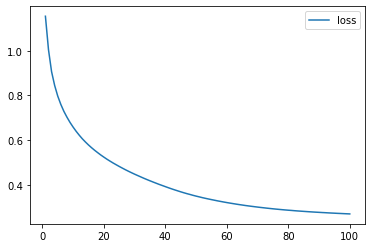

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

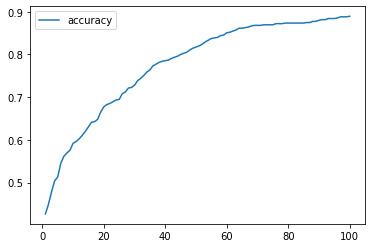

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 555us/step - loss: 0.5577 - accuracy: 0.6533
Epoch 2/100
24/24 [==============================] - 0s 512us/step - loss: 0.5296 - accuracy: 0.6920
Epoch 3/100
24/24 [==============================] - 0s 512us/step - loss: 0.5037 - accuracy: 0.7320
Epoch 4/100
24/24 [==============================] - 0s 555us/step - loss: 0.4797 - accuracy: 0.7627
Epoch 5/100
24/24 [==============================] - 0s 555us/step - loss: 0.4578 - accuracy: 0.7933
Epoch 6/100
24/24 [==============================] - 0s 555us/step - loss: 0.4375 - accuracy: 0.8040
Epoch 7/100
24/24 [==============================] - 0s 512us/step - loss: 0.4190 - accuracy: 0.8147
Epoch 8/100
24/24 [==============================] - 0s 555us/step - loss: 0.4017 - accuracy: 0.8173
Epoch 9/100
24/24 [==============================] - 0s 555us/step - loss: 0.3860 - accuracy: 0.8253
Epoch 10/100
24/24 [==============================] - 0s 555us/step - loss: 0.3714 - accura

24/24 [==============================] - 0s 512us/step - loss: 0.1469 - accuracy: 0.9413
Epoch 82/100
24/24 [==============================] - 0s 555us/step - loss: 0.1455 - accuracy: 0.9413
Epoch 83/100
24/24 [==============================] - 0s 555us/step - loss: 0.1440 - accuracy: 0.9413
Epoch 84/100
24/24 [==============================] - 0s 512us/step - loss: 0.1425 - accuracy: 0.9427
Epoch 85/100
24/24 [==============================] - 0s 512us/step - loss: 0.1412 - accuracy: 0.9427
Epoch 86/100
24/24 [==============================] - 0s 512us/step - loss: 0.1397 - accuracy: 0.9427
Epoch 87/100
24/24 [==============================] - 0s 512us/step - loss: 0.1382 - accuracy: 0.9427
Epoch 88/100
24/24 [==============================] - 0s 512us/step - loss: 0.1368 - accuracy: 0.9427
Epoch 89/100
24/24 [==============================] - 0s 512us/step - loss: 0.1354 - accuracy: 0.9480
Epoch 90/100
24/24 [==============================] - 0s 512us/step - loss: 0.1340 - accuracy: 

In [24]:
history_df

,loss,accuracy
1,1.154076,0.426667
2,1.004351,0.449333
3,0.906259,0.478667
4,0.844670,0.504000
5,0.797311,0.513333
...,...,...
96,0.272326,0.885333
97,0.271722,0.888000
98,0.271045,0.888000
99,0.270402,0.888000
